<a href="https://colab.research.google.com/github/ErosVillegass/ML-Course/blob/main/pytorch_1_linear_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción

In [ ]:
import torch
x = torch.rand(3)
print(x)
torch.cuda.is_available()
torch.__version__

tensor([0.0597, 0.1799, 0.5045])


'1.13.1+cu116'

Tensors

In [ ]:
import torch
x = torch.empty(3) # create a empty tensor
print(x)
x = torch.empty(2,2) # create a empty tensor
print(x)
x = torch.zeros(2,3) # tensor of zeros
print(x)
x = torch.ones(2,2, dtype=torch.float16) # tensor of floats
print(x, x.size())
x = torch.tensor([2, 3])
print(x)

tensor([1.4451e-35, 0.0000e+00, 3.3631e-44])
tensor([[1.4450e-35, 0.0000e+00],
        [3.3631e-44, 0.0000e+00]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1.],
        [1., 1.]], dtype=torch.float16) torch.Size([2, 2])
tensor([2, 3])
tensor([[0.9484, 1.0900],
        [1.4821, 1.6179]])


In [ ]:
# operations with tensors
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x, y)
z = x + y
print(z)

y.add_(x) # modifica y y le agrega x
print(y)

z = x * y
print(z)
z = torch.mul(x, y) # torch.div, torch.add, torch.sub
print(z)

tensor([[0.4351, 0.4462],
        [0.7706, 0.5783]]) tensor([[0.1186, 0.7497],
        [0.3971, 0.2931]])
tensor([[0.5538, 1.1959],
        [1.1677, 0.8714]])
tensor([[0.5538, 1.1959],
        [1.1677, 0.8714]])
tensor([[0.2410, 0.5336],
        [0.8999, 0.5039]])
tensor([[0.2410, 0.5336],
        [0.8999, 0.5039]])


Slicing and reshape

In [ ]:
# slicing
import torch

x = torch.rand(5, 3)
print(x[1:3, :])

print(x[1,2].item()) # para extraer un elemento
print(x.view(15)) # reshape to 1x15
print(x.view(3, 5)) # reshape to 3x5

tensor([[0.0426, 0.9370, 0.5943],
        [0.9736, 0.9646, 0.6275]])
0.5943241715431213
tensor([0.7340, 0.4004, 0.0248, 0.0426, 0.9370, 0.5943, 0.9736, 0.9646, 0.6275,
        0.6849, 0.4495, 0.1598, 0.3819, 0.8652, 0.5290])
tensor([[0.7340, 0.4004, 0.0248, 0.0426, 0.9370],
        [0.5943, 0.9736, 0.9646, 0.6275, 0.6849],
        [0.4495, 0.1598, 0.3819, 0.8652, 0.5290]])


Tensor and numpy are linked

In [ ]:
import torch
import numpy as np

a = torch.ones(5) # a is a tensor in CPU
#print(a)
b = a.numpy()     # b is a numpy matrix in CPU, a and b are linked because both are on CPU
print(b)

# if we modify a or b, the other is modifed
a.add_(1)
print(a)
print(b)

# numpy to torch
c = np.ones(5)
d = torch.from_numpy(c)
c += 1
print(c)
print(d)

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Escificamos el device de cuda

In [ ]:
import torch
import numpy as np

if torch.cuda.is_available():
  device = torch.device("cuda")
  x = torch.ones(2, 2, device=device)  # x is in GPU
  y = torch.ones(2, 2) # y is in CPU
  y = y.to(device) # movemos a GPU
  z = x + y # it performs in GPU
  z = z.to("cpu") # regresamos z al cpu


# Gradients

PyTorch tiene la opción de calcular las gradientes (derivadas parciales en el algoritmo de backpropagation). <br>

Por ejemplo para la función: $f = z(y(x))$, <br>
 donde: <br>
 $z = \frac{1}{n} \sum_{i = 1}^{n} (y_i)$ <br>
 $ y = x²$ <br>
 $z =\frac{1}{n} \sum_{i = 1}^{n} (x_i^2)$ <br>

Entonces, la derivada parcial usando la regla de la cadena: $ \frac{ \partial{z}}{\partial{x}} = \frac{ \partial{z}}{\partial{y}} \frac{ \partial{y}}{\partial{x}}$ \\

Para $i = 1$ y $x=[ 0.5, 0.25, 0.125, 0.1 ]$ \\
$\frac{ \partial{z}}{\partial{y_1}} = \frac{1}{n} \left[ \frac{\partial{y_1}}{\partial{y_1}} + \frac{\partial{y_2}}{\partial{y_1}} +\frac{\partial{y_3}}{\partial{y_1}} +\frac{\partial{y_4}}{\partial{y_1}} \right]$ \\

Como estoy derivando respecto a $y_1$, entonces $y_2, y_3, y_4$ son constantes y serán ceros al derivar.

$\frac{ \partial{z}}{\partial{y_1}} = \frac{1}{n} = \frac{1}{4}$ \\

Luego, la deriva parcial de $y$ respecto a $x_1$: \\

$\frac{ \partial{y}}{\partial{x_1}} = 2x$ \\

Finalmente:

$\frac{ \partial{z}}{\partial{x_1}} = \frac{x}{2}$ \\

PyTorch, tiene un forma de calcular estas derivadas.




In [ ]:
import torch

x = torch.tensor( [0.5, 0.25, 0.125, 0.1], requires_grad = True )

# feed forward
y = x**2
z = y.mean()

print(z)

# backporpagation
z.backward()
print(x.grad) # aqui tenemos las gradientes para x_1, x_2, x_3 y x_4
print(x/2)    # es lo mismo a lo que calculmos antes dz/dx = x/2


tensor(0.0845, grad_fn=<MeanBackward0>)
tensor([0.2500, 0.1250, 0.0625, 0.0500])
tensor([0.2500, 0.1250, 0.0625, 0.0500], grad_fn=<DivBackward0>)


Para quitar las gradientes de un tensor

In [ ]:
import torch
x = torch.randn(3, requires_grad=True)
print(x)

#option 1
x.requires_grad_(False)
print(x)

#option 2
x.detach()


tensor([-0.0166,  1.5275,  0.9359], requires_grad=True)
tensor([-0.0166,  1.5275,  0.9359])


tensor([-0.0166,  1.5275,  0.9359])

# Regresión lineal con Numpy

Regresion lineal con numpy. En este caso es una versión simple: $h(x) = wx$

In [ ]:
import torch
import numpy as np


# f = w * x
X = np.array( [1, 2, 3, 4], dtype=np.float32 )
Y = np.array( [2, 4, 6, 8], dtype=np.float32 )

# h = theta_0 * x  solo usamos un parametro
w = 0.0

# model prediction
def forward(x):
  return w * x

# loss
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()/2

# gradientes
# MSE = 1/2m * (w*x - y)**2
# dJ/dw = 1/m  (w*x - y)*x
def gradient(x, y, y_pred):
  return np.dot(x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.02
n_iters = 10

for epoch in range(n_iters):
  # predciton = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw = gradient(X, Y, y_pred)

  # update weights
  w -= learning_rate * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:0.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 1.200, loss = 15.000
epoch 2: w = 1.680, loss = 2.400
epoch 3: w = 1.872, loss = 0.384
epoch 4: w = 1.949, loss = 0.061
epoch 5: w = 1.980, loss = 0.010
epoch 6: w = 1.992, loss = 0.002
epoch 7: w = 1.997, loss = 0.000
epoch 8: w = 1.999, loss = 0.000
epoch 9: w = 1.999, loss = 0.000
epoch 10: w = 2.000, loss = 0.000


Regresion lineal con numpy. En este caso con dos parametros: $h(x) = w_0 + w_1x$

In [ ]:
import torch
import numpy as np


X = np.array( [1, 2, 3, 4], dtype=np.float32 )
Y = np.array( [3, 5, 7, 9], dtype=np.float32 )

# h = w0 + w1 * x
w0 = np.random.rand()
w1 = np.random.rand()

# model prediction
def forward(x):
  return w0 + w1 * x

# loss
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()/2

# gradientes
# MSE = 1/2m * (w0 + w1*x - y)**2
# dJ/dw0 = 1/m (w0 + w1*x - y)
# dJ/dw1 = 1/m (w0 + w1*x - y)*x
def gradient(x, y, y_pred):
  return (y_pred - y).mean(), np.dot(x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.01
n_iters = 30

for epoch in range(n_iters):
  # predciton = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  dw0, dw1 = gradient(X, Y, y_pred)

  # update weights
  w0 -= learning_rate * dw0
  w1 -= learning_rate * dw1

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w0 = {w0:.3f}, w1 = {w1:.3f}, loss = {l:0.3f}')

y_pred = forward(X)
print(Y)
print(y_pred)

Prediction before training: f(5) = 4.132
epoch 1: w0 = 0.340, w1 = 1.206, loss = 8.106
epoch 2: w0 = 0.367, w1 = 1.510, loss = 3.892
epoch 3: w0 = 0.385, w1 = 1.720, loss = 1.876
epoch 4: w0 = 0.399, w1 = 1.866, loss = 0.912
epoch 5: w0 = 0.408, w1 = 1.966, loss = 0.450
epoch 6: w0 = 0.415, w1 = 2.036, loss = 0.230
epoch 7: w0 = 0.420, w1 = 2.083, loss = 0.124
epoch 8: w0 = 0.423, w1 = 2.116, loss = 0.073
epoch 9: w0 = 0.426, w1 = 2.139, loss = 0.049
epoch 10: w0 = 0.428, w1 = 2.155, loss = 0.038
epoch 11: w0 = 0.430, w1 = 2.166, loss = 0.032
epoch 12: w0 = 0.432, w1 = 2.173, loss = 0.029
epoch 13: w0 = 0.433, w1 = 2.178, loss = 0.028
epoch 14: w0 = 0.434, w1 = 2.181, loss = 0.027
epoch 15: w0 = 0.436, w1 = 2.183, loss = 0.027
epoch 16: w0 = 0.437, w1 = 2.185, loss = 0.027
epoch 17: w0 = 0.438, w1 = 2.186, loss = 0.026
epoch 18: w0 = 0.439, w1 = 2.186, loss = 0.026
epoch 19: w0 = 0.440, w1 = 2.186, loss = 0.026
epoch 20: w0 = 0.441, w1 = 2.187, loss = 0.026
epoch 21: w0 = 0.441, w1 = 2

### Linear regression Sklearn

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# y = 1 * x_0 + 2 * x_1 + 3
y = np.dot(X, np.array([1, 2])) + 3

reg = LinearRegression().fit(X, y)
print(reg.score(X, y))
print(reg.coef_)
print(reg.intercept_)
reg.predict(np.array([[3, 5]]))

1.0
[1. 2.]
3.0000000000000018


array([16.])

4.738

# Regresión lineal con PyTorch

In [ ]:
import torch
import numpy as np


# f = w * x
X = torch.tensor( [1, 2, 3, 4], dtype=torch.float32 )
Y = torch.tensor( [2, 4, 6, 8], dtype=torch.float32 )

# h = theta_0 * x  solo usamos un parametro
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

# model prediction
def forward(x):
  return w * x

# loss
def loss(y, y_pred):
  return ((y - y_pred)**2).mean()/2

# gradientes
# MSE = 1/2m * (w*x - y)**2
# dJ/dw = 1/m  (w*x - y)*x
def gradient(x, y, y_pred):
  return np.dot(x, y_pred - y).mean()

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training
learning_rate = 0.02
n_iters = 40

for epoch in range(n_iters):
  # predciton = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  #dw = gradient(X, Y, y_pred)
  l.backward()

  with torch.no_grad(): # no grad xq, no queremos que esta operación no se considere en las gradientes
    # update weights
    w -= learning_rate * w.grad

  w.grad.zero_() # renicializamos las gradientes para que no se acumulen

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:0.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.300, loss = 15.000
epoch 2: w = 0.555, loss = 10.837
epoch 3: w = 0.772, loss = 7.830
epoch 4: w = 0.956, loss = 5.657
epoch 5: w = 1.113, loss = 4.087
epoch 6: w = 1.246, loss = 2.953
epoch 7: w = 1.359, loss = 2.134
epoch 8: w = 1.455, loss = 1.542
epoch 9: w = 1.537, loss = 1.114
epoch 10: w = 1.606, loss = 0.805
epoch 11: w = 1.665, loss = 0.581
epoch 12: w = 1.716, loss = 0.420
epoch 13: w = 1.758, loss = 0.303
epoch 14: w = 1.794, loss = 0.219
epoch 15: w = 1.825, loss = 0.158
epoch 16: w = 1.851, loss = 0.114
epoch 17: w = 1.874, loss = 0.083
epoch 18: w = 1.893, loss = 0.060
epoch 19: w = 1.909, loss = 0.043
epoch 20: w = 1.922, loss = 0.031
epoch 21: w = 1.934, loss = 0.023
epoch 22: w = 1.944, loss = 0.016
epoch 23: w = 1.952, loss = 0.012
epoch 24: w = 1.960, loss = 0.008
epoch 25: w = 1.966, loss = 0.006
epoch 26: w = 1.971, loss = 0.004
epoch 27: w = 1.975, loss = 0.003
epoch 28: w = 1.979, loss = 0.002
epoch 29: w = 

Regresión lineal utilizando un optimizer y loss de pytorch

In [ ]:
import torch
import torch.nn as nn


# f = w * x
X = torch.tensor( [1, 2, 3, 4], dtype=torch.float32 )
Y = torch.tensor( [2, 4, 6, 8], dtype=torch.float32 )

# h = theta_0 * x  solo usamos un parametro
w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)

learning_rate = 0.02
n_iters = 40

# model prediction
def forward(x):
  return w * x

# loss
loss = nn.MSELoss()

optimizer = torch.optim.SGD([w], lr=learning_rate)

print(f'Prediction before training: f(5) = {forward(5):.3f}')

# training

for epoch in range(n_iters):
  # predciton = forward pass
  y_pred = forward(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward()

  optimizer.step() # actualiza los parametros

  optimizer.zero_grad()

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:.3f}, loss = {l:0.3f}')

Prediction before training: f(5) = 0.000
epoch 1: w = 0.600, loss = 30.000
epoch 2: w = 1.020, loss = 14.700
epoch 3: w = 1.314, loss = 7.203
epoch 4: w = 1.520, loss = 3.529
epoch 5: w = 1.664, loss = 1.729
epoch 6: w = 1.765, loss = 0.847
epoch 7: w = 1.835, loss = 0.415
epoch 8: w = 1.885, loss = 0.203
epoch 9: w = 1.919, loss = 0.100
epoch 10: w = 1.944, loss = 0.049
epoch 11: w = 1.960, loss = 0.024
epoch 12: w = 1.972, loss = 0.012
epoch 13: w = 1.981, loss = 0.006
epoch 14: w = 1.986, loss = 0.003
epoch 15: w = 1.991, loss = 0.001
epoch 16: w = 1.993, loss = 0.001
epoch 17: w = 1.995, loss = 0.000
epoch 18: w = 1.997, loss = 0.000
epoch 19: w = 1.998, loss = 0.000
epoch 20: w = 1.998, loss = 0.000
epoch 21: w = 1.999, loss = 0.000
epoch 22: w = 1.999, loss = 0.000
epoch 23: w = 1.999, loss = 0.000
epoch 24: w = 2.000, loss = 0.000
epoch 25: w = 2.000, loss = 0.000
epoch 26: w = 2.000, loss = 0.000
epoch 27: w = 2.000, loss = 0.000
epoch 28: w = 2.000, loss = 0.000
epoch 29: w = 

Regresión lineal utilizando, loss, optimizer y model de PyTorch

In [ ]:
"""
1) design model
2) construct loss and optimizer
3) training
    - forward pass
    - backward pass, compute gradients
    - update parameters
"""
import torch
import torch.nn as nn

X = torch.tensor( [[1], [2], [3], [4]], dtype=torch.float32 )
Y = torch.tensor( [[2], [4], [6], [8]], dtype=torch.float32 )
X_test = torch.tensor( [5], dtype=torch.float32 )

n_samples, n_features = X.shape

input_size = n_features
output_size  = n_features

# option 1 -> use Linear directly
# model = nn.Linear(input_size, output_size)

# option 2 -> create a class
class MyLinearRegression(nn.Module):
  def __init__(self, input_file, output_file):
    super(MyLinearRegression, self).__init__()

    # layers
    self.lin = nn.Linear(input_size, output_size)

  def forward(self, x):
    return self.lin(x)

model = MyLinearRegression(input_size, output_size)
###################################################

learning_rate = 0.02
n_iters = 40

print(f'Prediction before training: f(5) = {model(X_test).item():.3f}')

# loss
loss = nn.MSELoss()

# optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training
for epoch in range(n_iters):
  # forward pass
  y_pred = model(X)

  # loss
  l = loss(Y, y_pred)

  # gradients
  l.backward()

  optimizer.step() # actualiza los parametros

  optimizer.zero_grad()

  if epoch % 1 == 0:
    [w, b] = model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():.3f}, loss = {l:0.3f}')

Prediction before training: f(5) = -4.467
epoch 1: w = 0.025, loss = 64.021
epoch 2: w = 0.609, loss = 28.438
epoch 3: w = 0.999, loss = 12.655
epoch 4: w = 1.259, loss = 5.654
epoch 5: w = 1.432, loss = 2.548
epoch 6: w = 1.548, loss = 1.171
epoch 7: w = 1.626, loss = 0.559
epoch 8: w = 1.678, loss = 0.287
epoch 9: w = 1.713, loss = 0.166
epoch 10: w = 1.737, loss = 0.112
epoch 11: w = 1.753, loss = 0.087
epoch 12: w = 1.765, loss = 0.076
epoch 13: w = 1.773, loss = 0.071
epoch 14: w = 1.778, loss = 0.068
epoch 15: w = 1.783, loss = 0.066
epoch 16: w = 1.786, loss = 0.065
epoch 17: w = 1.788, loss = 0.064
epoch 18: w = 1.790, loss = 0.063
epoch 19: w = 1.792, loss = 0.062
epoch 20: w = 1.794, loss = 0.062
epoch 21: w = 1.795, loss = 0.061
epoch 22: w = 1.797, loss = 0.060
epoch 23: w = 1.798, loss = 0.059
epoch 24: w = 1.799, loss = 0.059
epoch 25: w = 1.801, loss = 0.058
epoch 26: w = 1.802, loss = 0.057
epoch 27: w = 1.803, loss = 0.057
epoch 28: w = 1.804, loss = 0.056
epoch 29: w 

# Regresión lineal (completo)

epoch: 10, loss: 4293.2505
epoch: 20, loss: 3204.7151
epoch: 30, loss: 2417.2241
epoch: 40, loss: 1846.9069
epoch: 50, loss: 1433.4591
epoch: 60, loss: 1133.4550
epoch: 70, loss: 915.5817
epoch: 80, loss: 757.2305
epoch: 90, loss: 642.0568
epoch: 100, loss: 558.2316


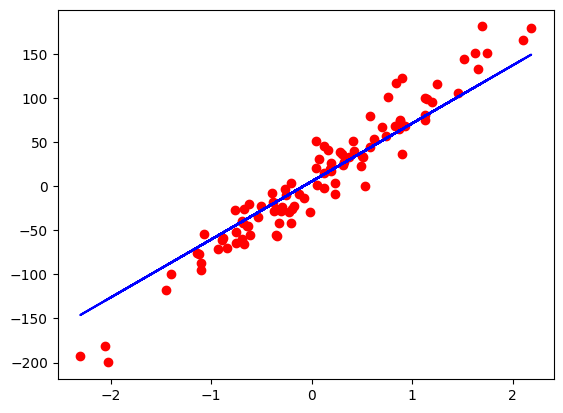

In [ ]:
"""
1) design model
2) construct loss and optimizer
3) training
    - forward pass
    - backward pass, compute gradients
    - update parameters
"""

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

# prepare datasets
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise = 20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# model
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forwars pass
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')


# plot
predicted = model(X).detach().numpy()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()




# Regresión logística con PyTorch

In [ ]:
"""
1) design model
2) construct loss and optimizer
3) training
    - forward pass
    - backward pass, compute gradients
    - update parameters
"""

import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# prepare datasets
bc = datasets.load_breast_cancer() # binary dataset
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 1234)

# scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


# model
# f = wx + b, sigmoid at the end
class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)

  def forward(self, x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted

model = LogisticRegression(n_features)


# loss and optimizer
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# training loop
num_epochs = 100
for epoch in range(num_epochs):
  # forwars pass
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)

  # backward pass
  loss.backward()

  # update
  optimizer.step()

  optimizer.zero_grad()

  if (epoch+1) % 10 == 0:
    print(f'epoch: {epoch+1}, loss: {loss.item():.4f}')

# si nohacemos esto, y_predicted.round() será considerado parte del grafo para el compute de las gradientes
with torch.no_grad():
  y_predicted = model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy: {acc:.4f}')





epoch: 10, loss: 0.4420
epoch: 20, loss: 0.3927
epoch: 30, loss: 0.3562
epoch: 40, loss: 0.3279
epoch: 50, loss: 0.3052
epoch: 60, loss: 0.2865
epoch: 70, loss: 0.2707
epoch: 80, loss: 0.2572
epoch: 90, loss: 0.2454
epoch: 100, loss: 0.2351
accuracy: 0.9123
